In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse

In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop,Nadam
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau
from keras.layers.merge import dot
from keras.models import Model

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from numba import jit # Compile some functions when performance is critical
import keras
from keras.initializers import RandomNormal
from keras.models import Model, load_model, save_model
from keras.layers import Embedding, Input, Dense, Concatenate, Multiply, Flatten,Dropout
from keras.optimizers import Adam
import tensorflow as tf

In [12]:
data1= pd.read_csv('BookDetails.csv')

In [13]:
data1

,Unnamed: 0,book_id,isbn,text_reviews_count,country_code,average_rating,link,authors,publisher,publication_year,image_url,ratings_count,title,genre,genre1
0,0,10365,375806814,7868,US,4.04,https://www.goodreads.com/book/show/10365.Wher...,"[{'author_id': '6810', 'role': ''}]",Yearling,2000.0,https://images.gr-assets.com/books/1166154337m...,271951,Where the Red Fern Grows,['children'],children
1,1,10959,1857993284,4324,US,3.88,https://www.goodreads.com/book/show/10959.Soph...,"[{'author_id': '1388082', 'role': ''}, {'autho...",Phoenix,1995.0,https://images.gr-assets.com/books/1343459906m...,111215,Sophie's World,['children'],children
2,2,5,043965548X,28561,US,4.53,https://www.goodreads.com/book/show/5.Harry_Po...,"[{'author_id': '1077326', 'role': ''}, {'autho...",Scholastic Inc.,2004.0,https://images.gr-assets.com/books/1499277281m...,1876252,Harry Potter and the Prisoner of Azkaban (Harr...,['children'],children
3,3,11387515,375869026,31536,US,4.43,https://www.goodreads.com/book/show/11387515-w...,"[{'author_id': '4859212', 'role': ''}]",Knopf,2012.0,https://images.gr-assets.com/books/1309285027m...,255461,Wonder (Wonder #1),"['children', 'young_adult']",children_YoungAdult
4,4,438492,64407683,3313,US,3.91,https://www.goodreads.com/book/show/438492.The...,"[{'author_id': '36746', 'role': ''}, {'author_...",HarperCollins Publishers,2000.0,https://images.gr-assets.com/books/1320705923m...,121250,The Wide Window (A Series of Unfortunate Event...,['children'],children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,19288,25698127,NaN,140,US,4.01,https://www.goodreads.com/book/show/25698127-y...,"[{'author_id': '14076277', 'role': ''}]",Penguin Teen Australia,2016.0,https://images.gr-assets.com/books/1433922022m...,533,Yellow,['young_adult'],YoungAdult
19289,19289,13919896,NaN,48,US,3.58,https://www.goodreads.com/book/show/13919896-g...,"[{'author_id': '4992850', 'role': ''}]",HarperTeen,2014.0,https://images.gr-assets.com/books/1369060906m...,177,Great,['young_adult'],YoungAdult
19290,19290,8129464,014132693X,229,US,4.07,https://www.goodreads.com/book/show/8129464-da...,"[{'author_id': '577975', 'role': ''}]",Puffin,2010.0,https://images.gr-assets.com/books/1338592847m...,3295,"Day of the Predator (TimeRiders, #2)",['young_adult'],YoungAdult
19291,19291,10860716,1554683394,78,US,3.84,https://www.goodreads.com/book/show/10860716-t...,"[{'author_id': '88922', 'role': ''}]",HarperCollins Canada,2011.0,https://images.gr-assets.com/books/1339611157m...,258,This Dark Endeavor (The Apprenticeship of Vict...,['young_adult'],YoungAdult


In [14]:
book = data1[['book_id','text_reviews_count','average_rating','publisher','publication_year',
             'ratings_count','genre1']]

In [15]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1
0,10365,7868,4.04,Yearling,2000.0,271951,children
1,10959,4324,3.88,Phoenix,1995.0,111215,children
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children
...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult


In [16]:
book['Pub1'] = book['publication_year']


/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1
0,10365,7868,4.04,Yearling,2000.0,271951,children,2000.0
1,10959,4324,3.88,Phoenix,1995.0,111215,children,1995.0
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0
...,...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0


In [18]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1
0,10365,7868,4.04,Yearling,2000.0,271951,children,2000.0
1,10959,4324,3.88,Phoenix,1995.0,111215,children,1995.0
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0
...,...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0


In [19]:
book["PY1"] = ""

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
for i in range(len(book)):
    if book.iloc[i][7]>=2000.0:
        book.iat[i,8]='a'
    elif book.iloc[i][7]>=1980.0 and book.iloc[i][7]<2000.0:
        book.iat[i,8]='b'
    elif book.iloc[i][7]>=1950.0 and book.iloc[i][7]<1980.0:
        book.iat[i,8]='c'
    elif book.iloc[i][7]=="NaN":
        book.iat[i,8]=''
    else:
        book.iat[i,8]='d'
        
    
        

In [22]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1
0,10365,7868,4.04,Yearling,2000.0,271951,children,2000.0,a
1,10959,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a
...,...,...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a


In [23]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1
0,10365,7868,4.04,Yearling,2000.0,271951,children,2000.0,a
1,10959,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a
...,...,...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a


In [24]:
data1= pd.read_csv('Dataset/UserInteractionV1.csv')

In [25]:
data2 = data1[['user_id','book_id','rating']]

In [26]:
data2 = data2.loc[:, ~data2.columns.str.contains('^Unnamed')]

In [27]:
users = data2.user_id.unique()
Books = data2.book_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
Bookid2idx = {o:i for i,o in enumerate(Books)}

In [28]:
data2['user_id'] = data2['user_id'].apply(lambda x: userid2idx[x])
data2['book_id'] = data2['book_id'].apply(lambda x: Bookid2idx[x])

In [29]:
book['book_id'] = book['book_id'].apply(lambda x: Bookid2idx[x])
book

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,a
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a
...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a


In [30]:
data1

,Unnamed: 0,book_id,Unnamed: 0.1,user_id,timestamp,rating,has_spoiler
0,0,10365,45,8842281e1d1347389f2ab93d60773d4d,2017-03-22,5,False
1,1,10365,9550,55475556ab32863fed66cb94a404af71,2013-01-27,5,False
2,2,10365,44316,e323acfc7b38cab03e68fb74bc32da45,2015-05-28,5,False
3,3,10365,62420,b85e8348c1e1f6ed6ae8e76bb6de7f15,2011-05-20,5,False
4,4,10365,68963,df7068f85819b1d0bd6b4ed20096692d,2011-11-13,5,False
...,...,...,...,...,...,...,...
1114794,1114794,35383830,1048804,79addbe68a26cbd8baa27e3b067a7b25,2017-10-25,4,False
1114795,1114795,35383830,1059546,be9de9603d71beb5b964a80dc6fc4778,2017-08-17,4,True
1114796,1114796,35383830,1109274,06ca020a59e70d460b5644588fdb2c20,2017-07-22,5,False
1114797,1114797,35383830,1151507,8481f58b5d184a4cc6d362e390ab2079,2017-10-23,4,True


In [31]:
book['features_genre'] = book['genre1']

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
book['features_genre'] = book['features_genre'].map(lambda x: x.split('_'))

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,a,[children]
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b,[children]
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a,[children]
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a,"[children, YoungAdult]"
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a,[children]
...,...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a,[YoungAdult]
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a,[YoungAdult]
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a,[YoungAdult]
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a,[YoungAdult]


In [34]:
book['PY1'] = book['PY1'].map(lambda x: x)

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,a,[children]
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b,[children]
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a,[children]
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a,"[children, YoungAdult]"
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a,[children]
...,...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a,[YoungAdult]
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a,[YoungAdult]
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a,[YoungAdult]
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a,[YoungAdult]


In [36]:
all_genres = set()
for row in book['features_genre']:
    # Union of sets is declared with the | operator
    all_genres = all_genres | set(row)
#all_genres.remove('') # Drop the empty genre

def invert_dict(d):
    return {value: key for key, value in d.items()}

all_genres = sorted(list(all_genres)) # We convert it to a list to enforce alphabetic ordering
ngenres = len(all_genres)

idx2genre = dict(enumerate(all_genres)) # Create a mapping dictionary from index to dict
genre2idx = invert_dict(idx2genre) # Inverse dict

genre2idx

{'YoungAdult': 0,
 'biography': 1,
 'children': 2,
 'comics-graphic': 3,
 'crime': 4,
 'fantasy': 5,
 'history': 6,
 'mystery': 7,
 'paranormal': 8,
 'poetry': 9,
 'romance': 10,
 'thriller': 11}

In [37]:
all_year = set()
for row in book['PY1']:
    # Union of sets is declared with the | operator
    all_year = all_year | set(row)
#all_genres.remove('') # Drop the empty genre

def invert_dict(d):
    return {value: key for key, value in d.items()}

all_year = sorted(list(all_year)) # We convert it to a list to enforce alphabetic ordering
nyear = len(all_year)

idx2year= dict(enumerate(all_year)) # Create a mapping dictionary from index to dict
year2idx = invert_dict(idx2year) # Inverse dict

year2idx

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [38]:
def encode_genres(genres):
    out = np.zeros(ngenres)
    for genre in genres:
        if genre == '':
            pass
        else:
            out[genre2idx[genre]] = 1
    return out.tolist()
book['features_genre'] = book['features_genre'].map(encode_genres)
book['features_genre']

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
19288    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19289    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19290    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19291    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19292    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: features_genre, Length: 19293, dtype: object

In [39]:
def encode_year(years):
    out = np.zeros(nyear)
    for year in years:
        if year == '':
            pass
        else:
            out[year2idx[year]] = 1
    return out.tolist()
book['PY1'] = book['PY1'].map(encode_year)
book['PY1']

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0        [1.0, 0.0, 0.0, 0.0]
1        [0.0, 1.0, 0.0, 0.0]
2        [1.0, 0.0, 0.0, 0.0]
3        [1.0, 0.0, 0.0, 0.0]
4        [1.0, 0.0, 0.0, 0.0]
                 ...         
19288    [1.0, 0.0, 0.0, 0.0]
19289    [1.0, 0.0, 0.0, 0.0]
19290    [1.0, 0.0, 0.0, 0.0]
19291    [1.0, 0.0, 0.0, 0.0]
19292    [1.0, 0.0, 0.0, 0.0]
Name: PY1, Length: 19293, dtype: object

In [40]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [32]:
#n_feats = len(book['features_genre'].iloc[0])

In [33]:
#n_feats

In [41]:
data2 = data2.join(book['features_genre'], on = 'book_id').dropna()

In [42]:
data2=data2.join(book['PY1'], on = 'book_id').dropna()

In [43]:
data=data2

In [44]:
data

,user_id,book_id,rating,features_genre,PY1
0,0,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
1,1,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
2,2,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
3,3,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
4,4,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...
1114794,10800,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
1114795,11917,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
1114796,5572,19292,5,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
1114797,11417,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"


In [45]:
data['features'] = data['features_genre'] + data['PY1']

In [39]:
data

,user_id,book_id,rating,features_genre,PY1,features
0,0,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
1114794,10800,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114795,11917,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114796,5572,19292,5,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114797,11417,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [46]:
H=pd.read_csv('Dataset/HueV1.csv')

In [47]:
H = H.loc[:, ~H.columns.str.contains('^Unnamed')]

In [48]:
H['book_id'] = H['book_id'].apply(lambda x: Bookid2idx[x])

In [49]:
H1=H
H1=H1.drop(['book_id'], axis=1)

In [50]:
H1=H1.drop(['R1','G1','B1','R2','G2','B2','R3','G3','B3'], axis=1)

In [51]:
H1= H1/255

In [52]:
H1

,H1,S1,V1,H2,S2,V2,H3,S3,V3
0,0.047059,0.592157,0.086275,0.611765,0.152941,0.380392,0.078431,0.262745,0.788235
1,0.015686,0.756863,0.721569,0.027451,0.458824,0.384314,0.058824,0.345098,0.764706
2,0.423529,0.160784,0.486275,0.031373,0.392157,0.737255,0.058824,0.196078,0.776471
3,0.376471,0.639216,0.898039,0.423529,0.129412,0.152941,0.352941,0.003922,0.980392
4,0.423529,0.050980,0.396078,0.070588,0.360784,0.945098,0.352941,0.039216,0.615686
...,...,...,...,...,...,...,...,...,...
19288,0.090196,0.121569,0.827451,0.078431,0.207843,0.564706,0.470588,0.203922,0.172549
19289,0.058824,0.388235,0.941176,0.392157,0.086275,0.270588,0.015686,0.607843,0.827451
19290,0.117647,0.356863,0.054902,0.101961,0.482353,0.447059,0.105882,0.392157,0.878431
19291,0.011765,0.392157,0.090196,0.023529,0.219608,0.341176,0.164706,0.023529,0.831373


In [53]:
H1['combined']= H1.values.tolist()

In [54]:
G=pd.read_csv('Dataset/GMM_v2.csv')

In [55]:
G = G.loc[:, ~G.columns.str.contains('^Unnamed')]

In [56]:
G['book_id'] = G['book_id'].apply(lambda x: Bookid2idx[x])

In [57]:
G1=G

G1 

In [58]:
G1

,book_id,0,1,2,3,4,5,6,7
0,0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
1,1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
2,2,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000
3,3,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.000
4,4,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...
19288,19288,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
19289,19289,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.000
19290,19290,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
19291,19291,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000


In [59]:
G1.drop(['book_id'], axis=1)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
2,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000
3,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.000
4,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...
19288,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
19289,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.000
19290,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
19291,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000


In [60]:
G1=G1.drop(['book_id'], axis=1)

In [61]:
G1

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
2,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000
3,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.000
4,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...
19288,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
19289,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.000
19290,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000
19291,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000


In [62]:
G1['combined']= G1.values.tolist()

In [63]:
G1

,0,1,2,3,4,5,6,7,combined
0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
2,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
4,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.000,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...
19288,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
19289,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.000,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
19290,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
19291,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"


In [58]:
data

,user_id,book_id,rating,features_genre,PY1,features
0,0,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
1114794,10800,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114795,11917,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114796,5572,19292,5,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114797,11417,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [59]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,"[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [64]:
A=pd.read_csv('autoencoder.csv')

In [65]:
A

,Unnamed: 0,book_id,0,1,2,3,4,5,6,7,...,830,831,832,833,834,835,836,837,838,839
0,0,10365,336.567322,86.105011,516.957886,666.663269,218.501877,259.385223,214.661697,333.605225,...,3617.356934,457.312958,0.000000,0.000000,3098.047119,767.290894,830.120667,4133.229492,0.000000,266.490265
1,1,10959,300.496185,2113.095703,3246.928955,710.132385,426.013428,0.000000,3568.370850,0.000000,...,2206.641357,0.000000,138.581207,234.782806,1705.628540,418.265961,1161.986206,2490.460693,0.000000,256.586182
2,2,5,402.152222,2116.786377,3385.882324,1399.020874,499.843323,194.756485,3472.161133,0.000000,...,3761.208252,36.831047,0.000000,0.000000,2703.469727,763.285889,1375.962524,4146.715820,0.000000,316.129791
3,3,11387515,365.183838,2267.571045,3518.785645,1380.674438,346.356903,198.988525,3719.760742,0.000000,...,4113.401367,0.000000,0.000000,17.299385,2947.544434,854.246399,1694.466675,4252.155762,0.000000,355.836304
4,4,438492,404.933746,1797.143555,2543.114990,1615.682617,200.091415,514.934509,2032.864014,0.000000,...,5042.122559,0.000000,0.000000,143.133453,3666.993896,1015.798462,2204.070068,5250.841797,0.000000,465.739960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,19288,25698127,550.099609,3169.285400,4718.741699,1759.975586,673.950134,191.642990,4761.909180,0.000000,...,4741.453125,0.000000,0.000000,0.000000,3458.593262,1013.675903,1945.091064,4922.946777,0.000000,412.459473
19289,19289,13919896,351.382721,2582.758057,3884.842041,1349.711182,222.799789,0.000000,4314.666992,0.000000,...,2613.409912,0.000000,0.000000,515.383728,2024.658081,548.349365,1111.619629,3190.914795,0.000000,293.922821
19290,19290,8129464,59.259892,3.204803,42.357513,69.611221,8.021275,43.501453,12.166361,55.233822,...,453.339783,0.000000,0.000000,405.434387,587.949341,237.941589,29.444099,695.635742,14.602487,215.525375
19291,19291,10860716,34.407333,101.139389,168.280655,109.980087,47.231335,50.026875,130.530685,0.000000,...,312.333466,7.702682,0.000000,0.000000,386.501465,68.915131,0.000000,379.015839,0.000000,21.254173


In [66]:
A = A.loc[:, ~A.columns.str.contains('^Unnamed')]

In [67]:
A=A.drop(['book_id'], axis=1)

In [68]:
A

,0,1,2,3,4,5,6,7,8,9,...,830,831,832,833,834,835,836,837,838,839
0,336.567322,86.105011,516.957886,666.663269,218.501877,259.385223,214.661697,333.605225,0.000000,503.469604,...,3617.356934,457.312958,0.000000,0.000000,3098.047119,767.290894,830.120667,4133.229492,0.000000,266.490265
1,300.496185,2113.095703,3246.928955,710.132385,426.013428,0.000000,3568.370850,0.000000,1263.930054,4761.668945,...,2206.641357,0.000000,138.581207,234.782806,1705.628540,418.265961,1161.986206,2490.460693,0.000000,256.586182
2,402.152222,2116.786377,3385.882324,1399.020874,499.843323,194.756485,3472.161133,0.000000,1436.421509,5531.342285,...,3761.208252,36.831047,0.000000,0.000000,2703.469727,763.285889,1375.962524,4146.715820,0.000000,316.129791
3,365.183838,2267.571045,3518.785645,1380.674438,346.356903,198.988525,3719.760742,0.000000,1443.894287,5749.733398,...,4113.401367,0.000000,0.000000,17.299385,2947.544434,854.246399,1694.466675,4252.155762,0.000000,355.836304
4,404.933746,1797.143555,2543.114990,1615.682617,200.091415,514.934509,2032.864014,0.000000,1221.589355,4279.887695,...,5042.122559,0.000000,0.000000,143.133453,3666.993896,1015.798462,2204.070068,5250.841797,0.000000,465.739960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,550.099609,3169.285400,4718.741699,1759.975586,673.950134,191.642990,4761.909180,0.000000,1974.843994,7682.243164,...,4741.453125,0.000000,0.000000,0.000000,3458.593262,1013.675903,1945.091064,4922.946777,0.000000,412.459473
19289,351.382721,2582.758057,3884.842041,1349.711182,222.799789,0.000000,4314.666992,0.000000,1735.847900,6686.811523,...,2613.409912,0.000000,0.000000,515.383728,2024.658081,548.349365,1111.619629,3190.914795,0.000000,293.922821
19290,59.259892,3.204803,42.357513,69.611221,8.021275,43.501453,12.166361,55.233822,0.000000,10.007467,...,453.339783,0.000000,0.000000,405.434387,587.949341,237.941589,29.444099,695.635742,14.602487,215.525375
19291,34.407333,101.139389,168.280655,109.980087,47.231335,50.026875,130.530685,0.000000,186.839539,360.170563,...,312.333466,7.702682,0.000000,0.000000,386.501465,68.915131,0.000000,379.015839,0.000000,21.254173


In [69]:
norma_A=(A-A.min())/(A.max()-A.min())

In [70]:
norma_A

,0,1,2,3,4,5,6,7,8,9,...,830,831,832,833,834,835,836,837,838,839
0,0.158871,0.017280,0.085522,0.265254,0.114739,0.123591,0.032698,0.162813,0.000000,0.055624,...,0.575004,0.270911,0.000000,0.000000,0.602921,0.517028,0.225188,0.586478,0.000000,0.140968
1,0.141844,0.424075,0.537149,0.282550,0.223707,0.000000,0.543542,0.000000,0.445767,0.526075,...,0.350761,0.000000,0.063819,0.066258,0.331938,0.281842,0.315213,0.353380,0.000000,0.135729
2,0.189829,0.424815,0.560136,0.556647,0.262477,0.092797,0.528887,0.000000,0.506602,0.611109,...,0.597870,0.021819,0.000000,0.000000,0.526131,0.514329,0.373258,0.588391,0.000000,0.167227
3,0.172379,0.455076,0.582123,0.549348,0.181878,0.094814,0.566602,0.000000,0.509238,0.635237,...,0.653854,0.000000,0.000000,0.004882,0.573632,0.575621,0.459659,0.603353,0.000000,0.188231
4,0.191142,0.360667,0.420715,0.642853,0.105072,0.245355,0.309650,0.000000,0.430835,0.472847,...,0.801481,0.000000,0.000000,0.040394,0.713646,0.684481,0.597900,0.745060,0.000000,0.246368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,0.259665,0.636040,0.780635,0.700265,0.353904,0.091314,0.725344,0.000000,0.696495,0.848743,...,0.753687,0.000000,0.000000,0.000000,0.673088,0.683050,0.527646,0.698533,0.000000,0.218183
19289,0.165864,0.518331,0.642681,0.537028,0.116996,0.000000,0.657219,0.000000,0.612205,0.738767,...,0.415420,0.000000,0.000000,0.145446,0.394026,0.369497,0.301550,0.452770,0.000000,0.155480
19290,0.027973,0.000643,0.007007,0.027697,0.004212,0.020727,0.001853,0.026956,0.000000,0.001106,...,0.072062,0.000000,0.000000,0.114418,0.114423,0.160333,0.007987,0.098706,0.021644,0.114009
19291,0.016241,0.020298,0.027839,0.043759,0.024802,0.023837,0.019883,0.000000,0.065895,0.039792,...,0.049648,0.004563,0.000000,0.000000,0.075218,0.046437,0.000000,0.053780,0.000000,0.011243


In [71]:
norma_A['combined']= norma_A.values.tolist()

In [72]:
norma_A

,0,1,2,3,4,5,6,7,8,9,...,831,832,833,834,835,836,837,838,839,combined
0,0.158871,0.017280,0.085522,0.265254,0.114739,0.123591,0.032698,0.162813,0.000000,0.055624,...,0.270911,0.000000,0.000000,0.602921,0.517028,0.225188,0.586478,0.000000,0.140968,"[0.15887100017712774, 0.017280310450270973, 0...."
1,0.141844,0.424075,0.537149,0.282550,0.223707,0.000000,0.543542,0.000000,0.445767,0.526075,...,0.000000,0.063819,0.066258,0.331938,0.281842,0.315213,0.353380,0.000000,0.135729,"[0.14184422081249892, 0.42407461938459684, 0.5..."
2,0.189829,0.424815,0.560136,0.556647,0.262477,0.092797,0.528887,0.000000,0.506602,0.611109,...,0.021819,0.000000,0.000000,0.526131,0.514329,0.373258,0.588391,0.000000,0.167227,"[0.18982926014419374, 0.4248152962486973, 0.56..."
3,0.172379,0.455076,0.582123,0.549348,0.181878,0.094814,0.566602,0.000000,0.509238,0.635237,...,0.000000,0.000000,0.004882,0.573632,0.575621,0.459659,0.603353,0.000000,0.188231,"[0.17237895012453683, 0.45507608878323114, 0.5..."
4,0.191142,0.360667,0.420715,0.642853,0.105072,0.245355,0.309650,0.000000,0.430835,0.472847,...,0.000000,0.000000,0.040394,0.713646,0.684481,0.597900,0.745060,0.000000,0.246368,"[0.1911422325448786, 0.3606665650810325, 0.420..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,0.259665,0.636040,0.780635,0.700265,0.353904,0.091314,0.725344,0.000000,0.696495,0.848743,...,0.000000,0.000000,0.000000,0.673088,0.683050,0.527646,0.698533,0.000000,0.218183,"[0.25966536108419236, 0.6360400515244949, 0.78..."
19289,0.165864,0.518331,0.642681,0.537028,0.116996,0.000000,0.657219,0.000000,0.612205,0.738767,...,0.000000,0.000000,0.145446,0.394026,0.369497,0.301550,0.452770,0.000000,0.155480,"[0.16586436266912272, 0.5183305887246805, 0.64..."
19290,0.027973,0.000643,0.007007,0.027697,0.004212,0.020727,0.001853,0.026956,0.000000,0.001106,...,0.000000,0.000000,0.114418,0.114423,0.160333,0.007987,0.098706,0.021644,0.114009,"[0.027972645071025697, 0.000643167985743673, 0..."
19291,0.016241,0.020298,0.027839,0.043759,0.024802,0.023837,0.019883,0.000000,0.065895,0.039792,...,0.004563,0.000000,0.000000,0.075218,0.046437,0.000000,0.053780,0.000000,0.011243,"[0.016241408814416106, 0.020297541586823134, 0..."


In [73]:
book['features'] =  H1['combined']+G1['combined']+norma_A['combined']

/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
n_feats=len(book['features'].iloc[0])

In [75]:
n_feats

857

In [76]:
data 

,user_id,book_id,rating,features_genre,PY1,features
0,0,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
1114794,10800,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114795,11917,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114796,5572,19292,5,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114797,11417,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [77]:
data=data.drop(['features_genre', 'PY1','features'], axis=1)

In [78]:
data

,user_id,book_id,rating
0,0,0,5
1,1,0,5
2,2,0,5
3,3,0,5
4,4,0,5
...,...,...,...
1114794,10800,19292,4
1114795,11917,19292,4
1114796,5572,19292,5
1114797,11417,19292,4


In [79]:
data = data.join(book['features'], on = 'book_id').dropna()

In [80]:
n_feats = len(data['features'].iloc[0])

In [81]:
n_feats

857

In [82]:
from sklearn.utils import shuffle
data4=data

In [83]:
data=shuffle(data)

In [84]:
x0 = data['user_id'].to_numpy()
x1 =data['book_id'].to_numpy()

In [85]:
x2 = np.stack(data['features'].to_numpy())

In [86]:
y = data['rating'].to_numpy()

In [87]:
def get_model(num_users, num_items, num_item_feats, mf_dim, layers=[64, 32, 16, 8]):
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    feats_input = Input(shape=(num_item_feats,), dtype='float32', name = 'feats_input')

    # User&Item Embeddings for Matrix Factorization
    MF_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = mf_dim,
                                  name = 'user_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    MF_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = mf_dim,
                                  name = 'item_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    
    # User&Item Embeddings for MLP part
    #MLP_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = int(layers[0] / 2),
                                   #name = 'mlp_embedding_user',
                                   #embeddings_initializer = RandomNormal(stddev=0.001),
                                   #input_length = 1)
   # MLP_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = int(layers[0] / 2),
                                   #name = 'mlp_embedding_item',
                                   #embeddings_initializer = RandomNormal(stddev=0.001),
                                   #input_length = 1) 
    
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    #mf_vector =dot([mf_user_latent, mf_item_latent])
    mf_vector =Concatenate()([mf_user_latent, mf_item_latent])
    mf_vector=Dense(96,activation='relu')(mf_vector)
    mf_vector=Dropout(0.4)(mf_vector)
    
    sim=dot([mf_user_latent,mf_item_latent],name='SimalarityDotProduct',axes=1)  

    # MLP part with item features
    #mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    #mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    mlp_vector = Concatenate()([mf_vector, feats_input,sim])
    
    #mlp_vector = Concatenate()([mlp_user_latent, mlp_item_latent, feats_input])
    for l in layers:
        layer = Dense(l, activation='relu')
        mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    prediction_1=Dense(4, activation = 'relu')(mlp_vector)
    
    #prediction_1=Dense(8, activation = 'relu')(predict_vector)
    #prediction_2=Dense(2, activation = 'relu')(prediction_1)
    #Final prediction layer
    prediction = Dense(1, activation = LeakyReLU(alpha=0.05),
                       kernel_initializer = 'lecun_uniform',
                       name = 'prediction')(prediction_1)
    
    model = Model(input = [user_input, item_input, feats_input], output = prediction)
    return model

In [88]:
def getData(k,i):
    l=len(data4)
    l1=int(l/k)
    j=l1*(i+1)
    i=l1*i
    x0_val=x0[i:j]
    x1_val=x1[i:j]
    x2_val=x2[i:j]
    y_val=y[i:j]
    
    if i==0:
        x0_train=x0[j:l]
        x1_train=x1[j:l]
        x2_train=x2[j:l]
        y_train=y[j:l]
    elif i==k-1:
        x0_train=x0[0:i]
        x1_train=x1[0:i]
        x2_train=x2[0:i]
        y_train=y[0:i]
    else:
        x0_train=np.concatenate((x0[0:i],x0[j:l]))
        x1_train=np.concatenate((x1[0:i],x1[j:l]))
        x2_train=np.concatenate((x2[0:i],x2[j:l]))
        y_train=np.concatenate((y[0:i],y[j:l]))    
              
    x_train=[x0_train,x1_train,x2_train]
    x_val=[x0_val,x1_val,x2_val]
    
    return x_train,y_train,x_val,y_val

In [89]:
learning_rate = 0.001
batch_size = 128
#n_epochs = 20
mf_dim = 15
layers = [750,512,256,128,64, 32, 16, 8]
n_users=len(users)
n_book=len(Books)
n_folds=5

In [90]:
def root_mean_squared_error(y_train, y_val):
        return K.sqrt(K.mean(K.square(y_val - y_train))) 

In [91]:
from keras.layers import LeakyReLU

In [94]:
for i in range(n_folds):
    print("Training on Fold: ",i+1)
    
    x_train,y_train,x_val,y_val=getData(n_folds,i)
    
    model = None
    model = get_model(n_users, n_book, n_feats, mf_dim, layers)
    model.compile(optimizer = 
                  Adam(lr = 0.001), loss =root_mean_squared_error)
    results = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val),
                 batch_size = batch_size, epochs = 3, verbose = True)
    print("Val Score: ", model.evaluate(x_val, y_val))

Training on Fold:  1


/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 1182s 1ms/step - loss: 1.1424 - val_loss: 1.0973
Epoch 2/3
891840/891840 [==============================] - 1113s 1ms/step - loss: 1.0787 - val_loss: 1.0898
Epoch 3/3
222959/222959 [==============================] - 14s 62us/step
Val Score:  1.0714804439086916
Training on Fold:  2


/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 1617s 2ms/step - loss: 1.8574 - val_loss: 1.2493
Epoch 2/3
891840/891840 [==============================] - 1723s 2ms/step - loss: 1.2511 - val_loss: 1.2494
Epoch 3/3
222959/222959 [==============================] - 15s 66us/step
Val Score:  1.238218271667475
Training on Fold:  3


/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 2088s 2ms/step - loss: 1.1376 - val_loss: 1.0928
Epoch 2/3
891840/891840 [==============================] - 2166s 2ms/step - loss: 1.0753 - val_loss: 1.0809
Epoch 3/3
222959/222959 [==============================] - 16s 70us/step
Val Score:  1.0678998121275471
Training on Fold:  4


/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 3771s 4ms/step - loss: 1.1414 - val_loss: 1.0837
Epoch 2/3
891840/891840 [==============================] - 1858s 2ms/step - loss: 1.0776 - val_loss: 1.0745
Epoch 3/3
222959/222959 [==============================] - 13s 60us/step
Val Score:  1.0600293633294724
Training on Fold:  5


/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`
/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 1504s 2ms/step - loss: 1.1397 - val_loss: 1.0982
Epoch 2/3
891840/891840 [==============================] - 1908s 2ms/step - loss: 1.0766 - val_loss: 1.0831
Epoch 3/3
222959/222959 [==============================] - 15s 67us/step
Val Score:  1.0722523082227031


In [95]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 15)        280335      user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 15)        289410      item_input[0][0]                 
___________________________________________________________________________________________

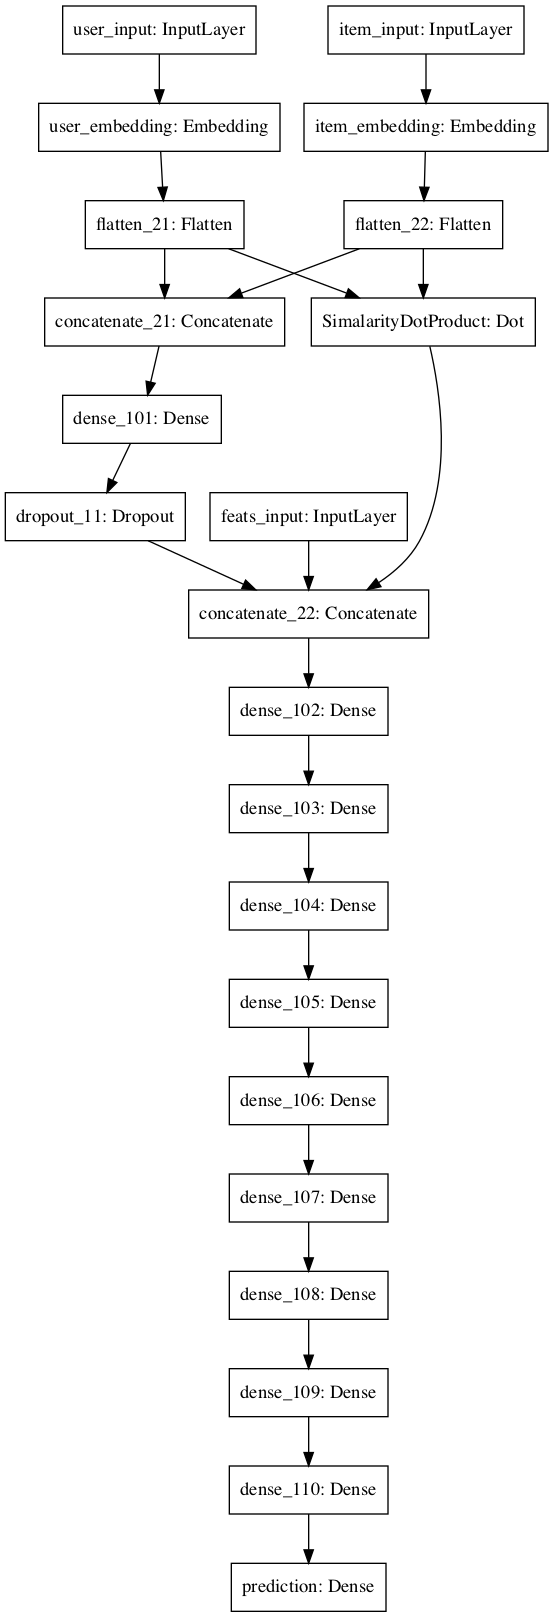

In [96]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')